# $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ΑΣΚΗΣΗ 5
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$Βασίλης Πουλος, 2805
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$Κωστάκης Ελευθέριος-Παναγιώτης, 2741<br><br>
Κατα την διάρκεια της πανδημίας πολλοί ανθρωποι μείνανε κλεισμένοι
μέσα στα σπίτια τους είτε προληπτικά είτε λόγο lockdown. Επομένως
αναγκάστηκαν να ξοδέψουν τον ελεύθερο τους χρόνο σε εναλλακτικές 
δραστηριότητες. Υποθέτουμε οτι πολλοί ηταν αυτόι που επέλεξαν το 
βιβλίο σαν εναλλακτική.  

Το ερώτημα που θέσαμε είναι:
Yπάρχει συσχέτηση μεταξυ της αυξησης των κρουσμάτων και των αναζητήσεων στο θέμα βιβλίο στην Ελλάδα; Αν ναί είχε σχέση με τις
περιόδους του lockdown;

Για αρχη συλέξαμε τα δεδομένα των αναζητήσεω στο θέμα βιβλίο 
απο το Google Trends και τα οπιτκοποιήσαμε σε ενα γράφημα το οποίο
φαίνεται ο μέσος όρος του πλήθους αναζητήσεων ανα μήνα για το έτος 2020.


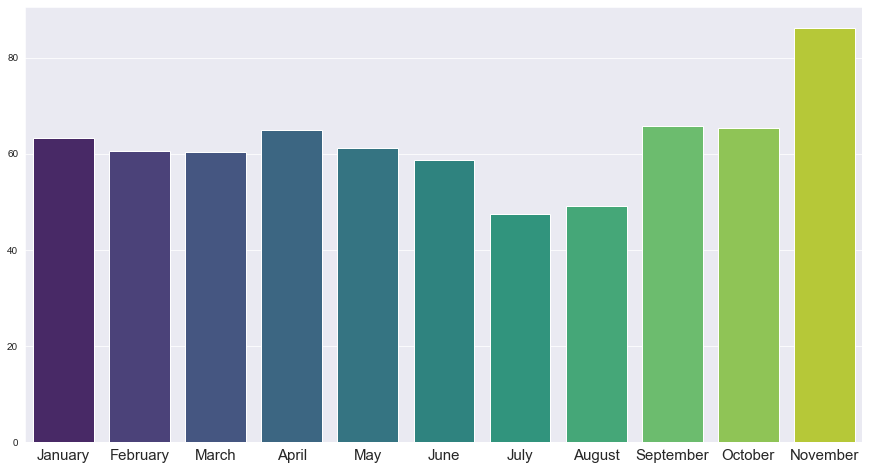

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df1 = pd.read_csv('multiTimeline2020.csv')

df1['Week'] = pd.to_datetime(df1['Εβδομάδα'])
df1['month'] = df1['Week'].dt.month
df1 = df1.drop(columns = 'Εβδομάδα')

mean_score = []
mean_books = []

for j in range(1,12):
    for i in range(len(df1.month)):
        if df1.month.values[i]==j:
            mean_score.append(df1.Score.values[i])
    mean_books.append(np.mean(mean_score))
    mean_score = []


months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,8))
g = sns.barplot(data = df1, x = months, y = mean_books, order = months, palette = 'viridis')
g.set_xticklabels(months, fontsize=15);



### Στην συνέχεια φτιάξαμε το παρακάτω γράφημα στο οποίο φαίνεται η μέση τιμή των νέων κρουσμάτων ανα μήνα.

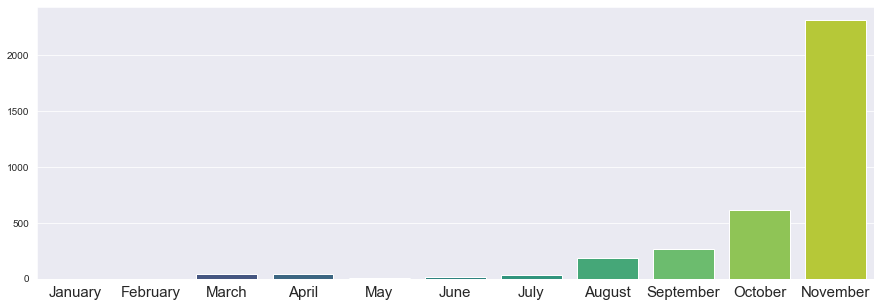

In [2]:
fields = ['iso_code','location','date','new_cases']

# Add also death_rate column
df = pd.read_csv('owid-covid-data.csv', usecols = fields)
df = df.loc[df.location == 'Greece']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

df['month'] = pd.to_datetime(df['date'])
df['month'] = df['month'].dt.month

mean_cases = []
mean_greece = []
for j in range(1,12):
    for i in range(len(df.month)):
        if df.month.values[i]==j:
            mean_cases.append(df.new_cases.values[i])
    mean_greece.append(np.nanmean(mean_cases))
    mean_cases = []

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,5))
s = sns.barplot(data = df, x = months, y = mean_greece, palette = 'viridis')
s.set_title('')
s.set_xticklabels(months, fontsize=15);

Θεωρούμε ακραία(outlier) την τιμή του μήνα Νοέμβριου καθώς 'χαλάει' την κατανομή μας(power-law) έτσι την αφαιρούμε για να έχουμε αποτελέσματα πιο κοντά στην πραγματικότητα.

In [3]:
from datetime import datetime
cross_df = pd.DataFrame({"mean_scores": mean_books, "mean_cases":mean_greece})

cross_df.index+=1
months = np.array([])

for x in cross_df.index:
    datetime_object = datetime.strptime(str(x), "%m")
    full_month_name = datetime_object.strftime("%B")
    months = np.append(months,full_month_name)
cross_df = cross_df.set_index(months)
cross_df.index.name = 'month'

# Remove the outlier
cross_df = cross_df.drop('November')
cross_df

,mean_scores,mean_cases
month,,
January,63.25,0.000000
February,60.50,0.137931
March,60.40,41.655172
April,65.00,45.466667
May,61.20,10.935484
June,58.75,15.833333
July,47.50,32.612903
August,49.20,184.935484
September,65.75,266.300000


Για να δουμε την συσχέτηση μεταξύ των δεδομένων χρησιμοποιήσαμε τον
συντελεστής συσχέτισης Pearson. 

In [4]:
from scipy.stats import pearsonr
pearson1 = pearsonr(cross_df.mean_scores, cross_df.mean_cases)
pearson1

(0.2646694869356922, 0.45991576936037737)

Παρατηρείται οτι δεν υπάρχει στατιστικά σημαντικη συσχέτηση ούτε κάποιο στατιστικό ενδιαφέρον
μεταξυ των δεδομένων επομένως η υπόθεση μας είναι εσφαλμένη.

Παρακάτω παραθέτουμε ενα ακόμη γράφημα το οποίο φαίνεται ο μέσος όρος του πλήθους αναζητήσεων ανα μήνα για το έτος 2018.

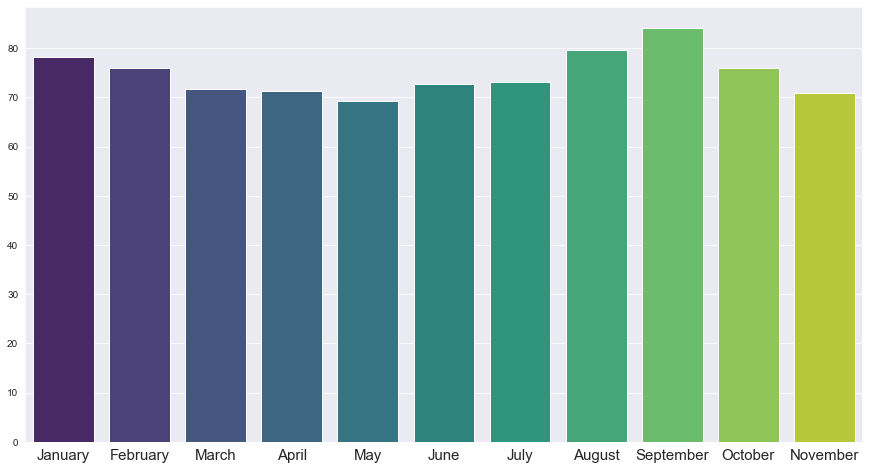

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df_books = pd.read_csv('multiTimeline2018.csv')

df_books['Week'] = pd.to_datetime(df_books['Εβδομάδα'])
df_books['month'] = df_books['Week'].dt.month
df_books = df_books.drop(columns = 'Εβδομάδα')

mean_score = []
mean_books18 = []

for j in range(1,12):
    for i in range(len(df_books.month)):
        if df_books.month.values[i]==j:
            mean_score.append(df_books.Score.values[i])
    mean_books18.append(np.mean(mean_score))
    mean_score = []


months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,8))
g = sns.barplot(data = df_books, x = months, y = mean_books18, order = months, palette = 'viridis')
g.set_xticklabels(months, fontsize=15);



Το βιβλίο φαίνεται να μην έχει χάσει την δημοτικότητα του όσο αναφορα
τις αναζητήσεις στο google και μάλιστα όπως παρατηρούμε στο παραπάνω 
γράφημα σε προηγούμενες χρονίες η δημοτικότητα του ηταν ποίο αυξημένη
απο τα φετινά δεδομένα.